In [5]:
import numpy as np
import pandas as pd
import math
import os

In [6]:
train = pd.read_csv('/Users/rakshitmalhotra/Desktop/appgames.csv')
train.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [7]:
train['User Rating Count'] = train['User Rating Count'].fillna(np.mean(train['User Rating Count']))
train['Average User Rating'] = train['Average User Rating'].fillna(np.mean(train['Average User Rating']))
train['User Rating Count'] = train['User Rating Count'].apply(lambda x: int(math.log(x,10)))
train['User Rating Count'] = train['User Rating Count'].apply(lambda x: 1 if x>=3 else 0)

print(train.groupby('User Rating Count')['ID'].nunique())

User Rating Count
0     6327
1    10520
Name: ID, dtype: int64


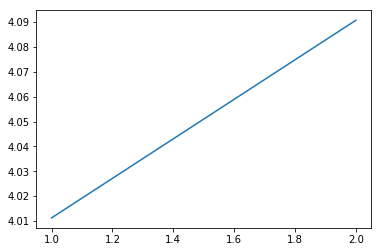

In [9]:
import matplotlib.pyplot as plt
x = np.arange(1,3)
y = train.groupby(train['User Rating Count'])['Average User Rating'].mean()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
plt.show()

In [10]:
train['Price'] = train['Price'].fillna(np.mean(train['Price']))
train['Price'] = train['Price'].apply(lambda x: 5.99 if x>=5.99 else x)
print(train.groupby('Price')['ID'].nunique())

Price
0.000000    14084
0.813419       24
0.990000     1065
1.990000      512
2.990000      466
3.990000      160
4.990000      232
5.990000      304
Name: ID, dtype: int64


[0.         0.81341871 0.99       1.99       2.99       3.99
 4.99       5.99      ]
Price
0.000000    4.065498
0.813419    4.060905
0.990000    4.009478
1.990000    4.045872
2.990000    4.028319
3.990000    4.125966
4.990000    4.061886
5.990000    4.068763
Name: Average User Rating, dtype: float64


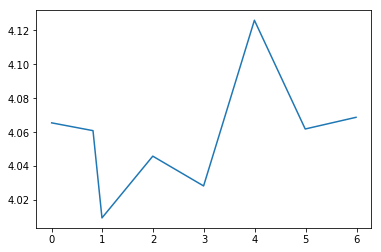

In [11]:
x = train.sort_values('Price',ascending=[True])
x = x['Price'].unique()
y = train.groupby(train['Price'])['Average User Rating'].mean()
print(x)
print(train.groupby(train['Price'])['Average User Rating'].mean())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
plt.show()

In [12]:
import tensorflow as tf
print(tf.__version__)


1.13.1


In [13]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []
train_length = int(len(train)/2)

training_sentences = (train['Description'][:train_length])
training_labels = train['User Rating Count'][:train_length]
testing_sentences = (train['Description'][train_length:])
testing_labels = train['User Rating Count'][train_length:]# training_labels_final = np.array(training_labels)

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [9]:
vocab_size = 10000
embedding_dim = 100
max_length = 150
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)



In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

the classic game of reversi also known as othello is a much loved strategy board game it is often described as taking only a minute to learn but a lifetime to master each game only takes a few minutes making it ideal for your iphone or ipod touch it can be played by all ages this continues to be one of the most sought after versions of the game for the natural ai when playing against the cpu and the refreshing crisp graphics n nfeatures n n one or two player mode n six levels of difficulty from beginner to guru n each level has its own style of play n strong computer opponent at higher levels n fast computer play n option for suggestions to help improve your game play n four <OOV> styled boards n unlimited undo and redo n scoreboard n auto save game in progress n
The classic game of Reversi, also known as Othello, is a much-loved strategy board game. It is often described as taking only a minute to learn but a lifetime to master. Each game only takes a few minutes, making it ideal for 

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='tanh')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 90006     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 1,090,013
Trainable params: 1,090,013
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 8503 samples, validate on 8504 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
8503/8503 [==============================] - 13s 2ms/sample - loss: 0.7871 - acc: 0.5729 - val_loss: 0.6228 - val_acc: 0.6733
Epoch 2/10
8503/8503 [==============================] - 13s 2ms/sample - loss: 0.5192 - acc: 0.8242 - val_loss: 0.6630 - val_acc: 0.6504
Epoch 3/10
8503/8503 [==============================] - 14s 2ms/sample - loss: 0.3345 - acc: 0.9247 - val_loss: 0.7734 - val_acc: 0.6399
Epoch 4/10
8503/8503 [==============================] - 17s 2ms/sample - loss: 0.2256 - acc: 0.9560 - val_loss: 0.8880 - val_acc: 0.6313
Epoch 5/10
8503/8503 [==============================] - 15s 2ms/sample - loss: 0.1922 - acc: 0.9718 - val_loss: 0.7889 - val_acc: 0.6797
Epoch 6/10
8503/8503 [==============================] - 16s 2ms/sample - loss: 0.1743 - acc: 0.9798 - val_loss: 0.7959 - val_acc: 0.6841
Epoch 7/10
8503/8503 [==============================] - 10s 1ms/sample - loss: 0.1